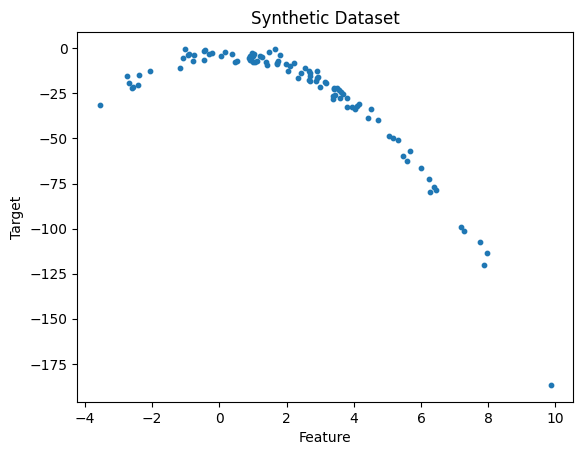

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

np.random.seed(42)
X = 2 - 3 * np.random.normal(0, 1, 100)
y = X - 2 * (X ** 2) + np.random.normal(-3, 3, 100)
X = X[:, np.newaxis]


plt.scatter(X, y, s=10)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Synthetic Dataset")
plt.show()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def plot_model(degree):
    polynomial_features = PolynomialFeatures(degree=degree)
    X_train_poly = polynomial_features.fit_transform(X_train)
    X_test_poly = polynomial_features.transform(X_test)
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_range_poly = polynomial_features.transform(X_range)
    y_range_pred = model.predict(X_range_poly)
    plt.scatter(X_train, y_train, s=10, label='Train')
    plt.scatter(X_test, y_test, s=10, label='Test')
    plt.plot(X_range, y_range_pred, label=f'Degree {degree}', color='r')
    plt.xlabel("Feature")
    plt.ylabel("Target")
    plt.title(f"Degree {degree}\nTrain Error: {train_error:.2f} | Test Error: {test_error:.2f}")
    plt.legend()
    plt.show()

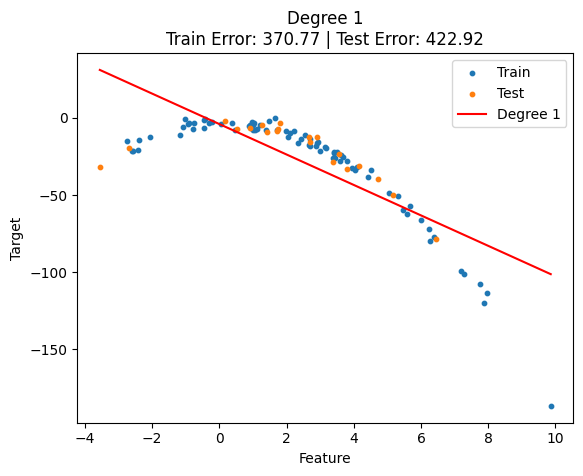

In [4]:
plot_model(degree=1)

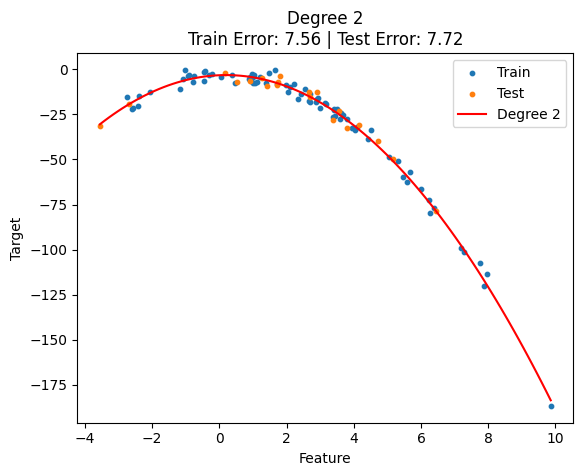

In [5]:
plot_model(degree=2)

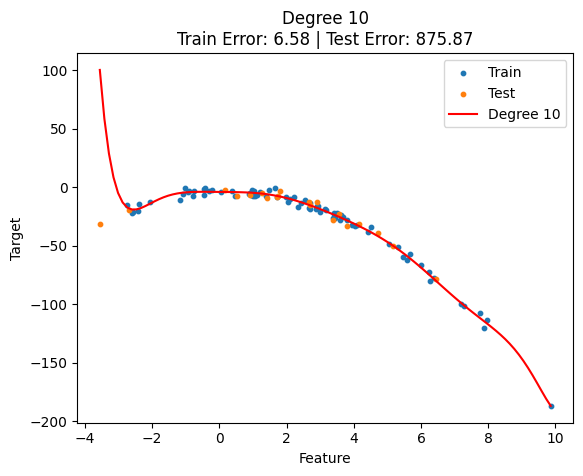

In [6]:
plot_model(degree=10)